# Lecture 07c:  More Interactive plots.


Run the notebook cell by cell and:
* read the code,
* understand the use of each plot,  
* the info of the data presented in each plot.

Code Repo of various plotly examples:     
https://plotly.com/python/plotly-express

Plotly examples datasets:  
https://plotly.com/python-api-reference/generated/plotly.data.html  

Curated by Thanasis Argyriou, UOA BIS Postgrad python course, 2022.

In [1]:
import plotly.express as px

px.defaults.width=800
px.defaults.height=500  # this will make all plots to have the same height. (Not optimal practice, but faster rendering for the class.)

## 1. Polar plot (polar coordinates)
https://en.wikipedia.org/wiki/Polar_coordinate_system  

Wind dataset:  
Each row represents a level of wind intensity in a cardinal direction, and its frequency.



In [2]:
df = px.data.wind()
df.head(4)

direction strength  frequency
0         N      0-1        0.5
1       NNE      0-1        0.6
2        NE      0-1        0.5
3       ENE      0-1        0.4

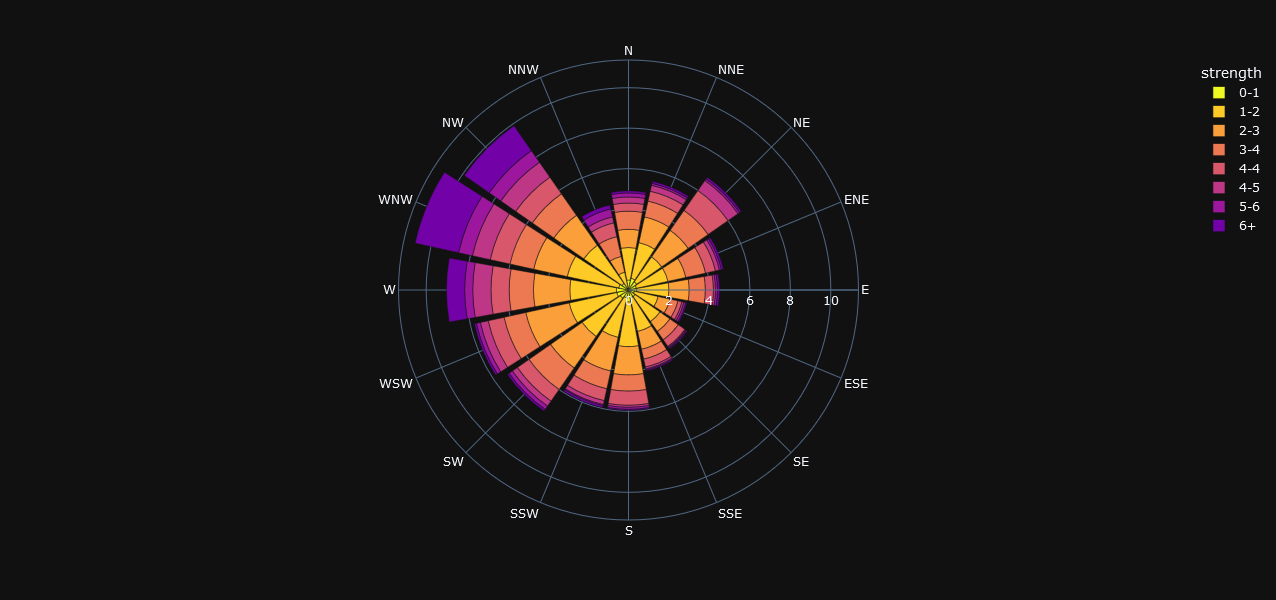

In [3]:
fig = px.bar_polar(df, r="frequency", theta="direction", height=600,
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## 2. Parallel coordinate plots for multivariate numeric data.  
https://en.wikipedia.org/wiki/Parallel_coordinates   

[IRIS flowers dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)   
Each row represents a flower, its sepal and pedal length and width for various species.

In [4]:
df = px.data.iris()
df.sample(6)

sepal_length  sepal_width  petal_length  petal_width     species  \
75            6.6          3.0           4.4          1.4  versicolor   
29            4.7          3.2           1.6          0.2      setosa   
145           6.7          3.0           5.2          2.3   virginica   
124           6.7          3.3           5.7          2.1   virginica   
47            4.6          3.2           1.4          0.2      setosa   
101           5.8          2.7           5.1          1.9   virginica   

     species_id  
75            2  
29            1  
145           3  
124           3  
47            1  
101           3

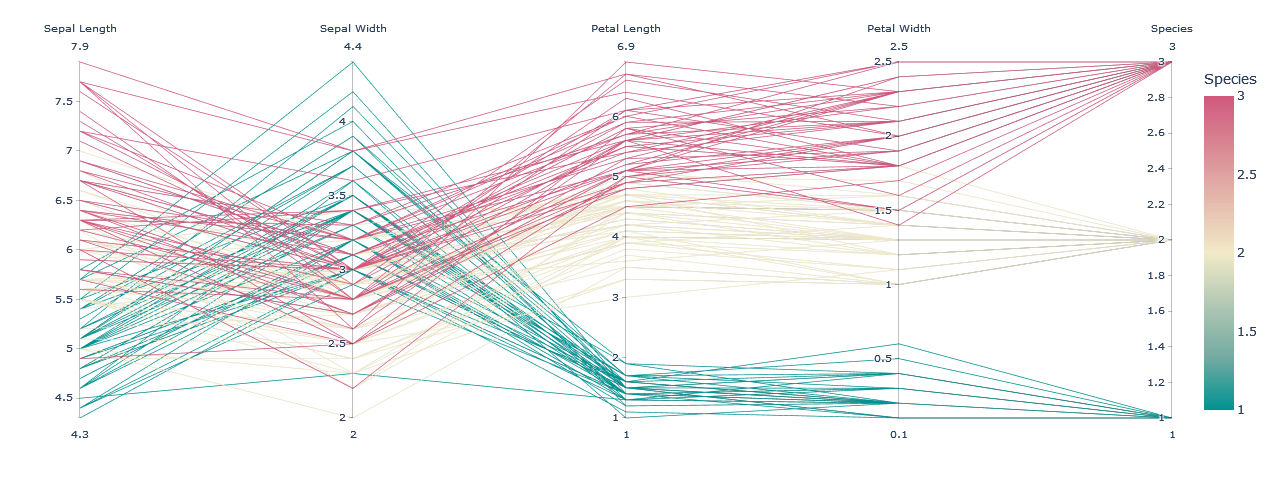

In [5]:
# click on vertical axes to select values
# click on top of vertical axes to focus between characteristics.
fig = px.parallel_coordinates(
    df, color="species_id",
    labels={"species_id": "Species", "sepal_width": "Sepal Width",
            "sepal_length": "Sepal Length","petal_width": "Petal Width",
            "petal_length": "Petal Length", },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)

fig.show()

## 3. Parallel coordinate plots for multivariate categorical data.  

[tips dataset](https://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html)  
Waiter recorded information about each tip he received, details:  
* tip in dollars,  
* bill in dollars,  
* sex of the bill payer,  
* whether there were smokers in the group,  
* day of the week,  
* time of day,  
* size of the group.

In [6]:
df = px.data.tips()
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

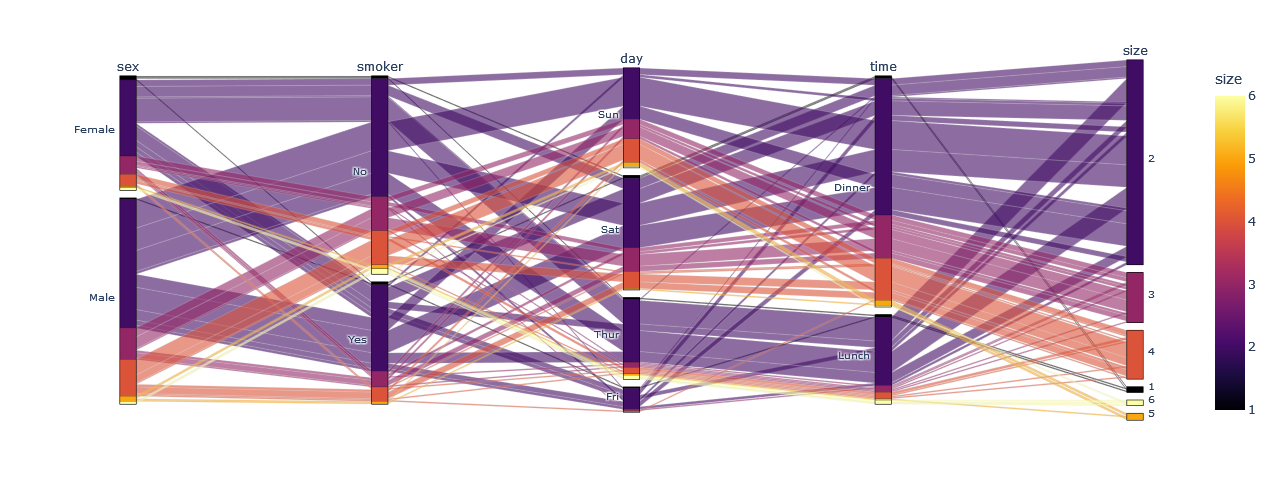

In [7]:
fig = px.parallel_categories(
    df, color="size", color_continuous_scale=px.colors.sequential.Inferno)

fig.show()

## 4. Ternary plots (3 variables in 2D).  
https://en.wikipedia.org/wiki/Ternary_plot  

Election dataset:  
Each row represents voting results for an electoral district in the 2013 Montreal mayoral election.

In [8]:
df = px.data.election()
df.head()

district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

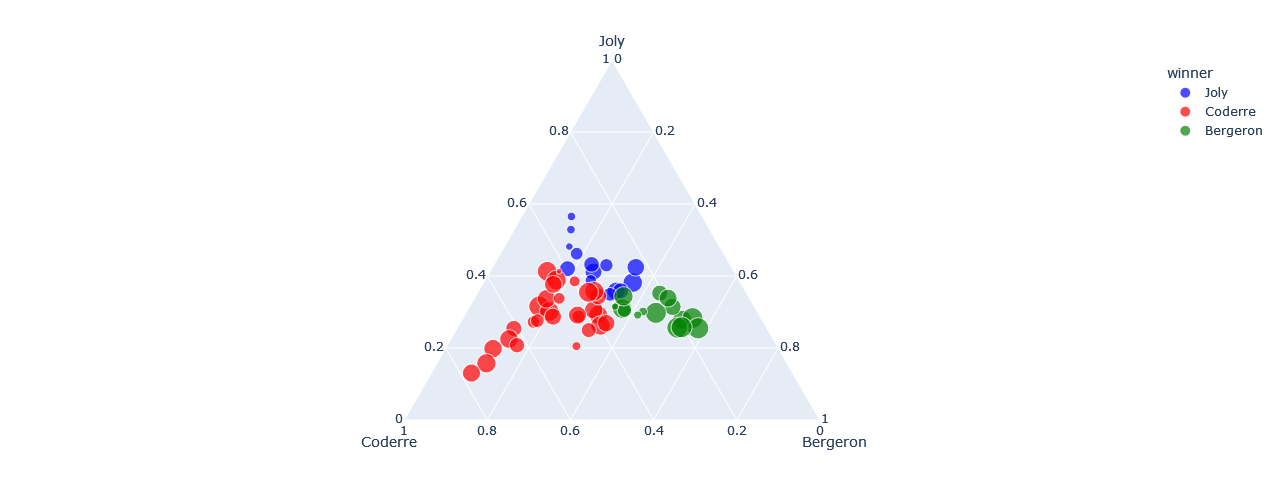

In [9]:
fig = px.scatter_ternary(
    df, a="Joly", b="Coderre", c="Bergeron", color="winner", size="total",
    hover_name="district", size_max=15,
    color_discrete_map={"Joly": "blue", "Bergeron": "green", "Coderre":"red"})

fig.show()

## 5. 3D plots

In [10]:
df = px.data.election()
df.head()

district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

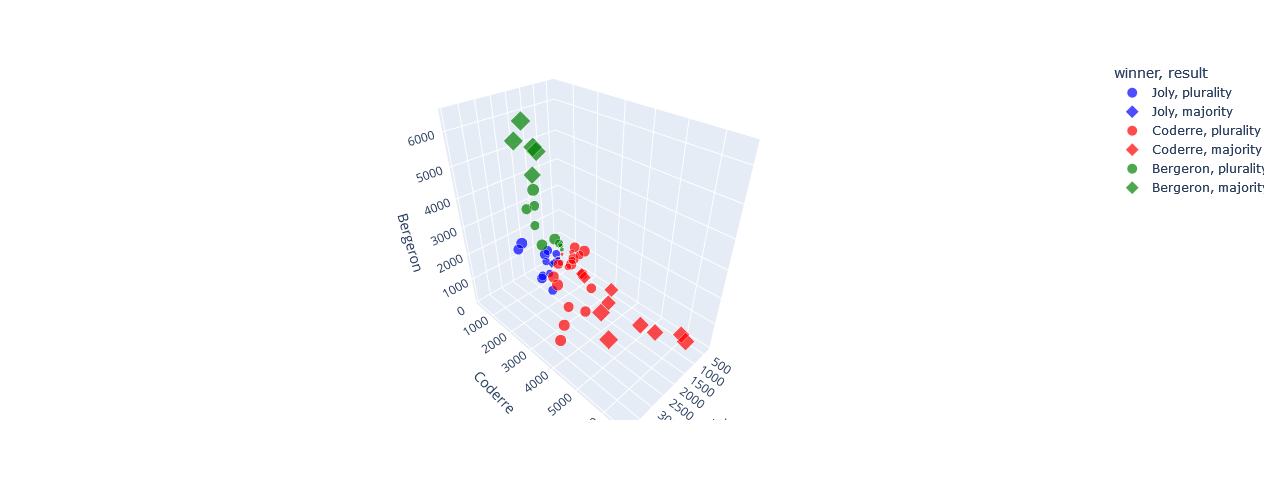

In [11]:
fig = px.scatter_3d(
    df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total",
    hover_name="district", symbol="result",
    color_discrete_map={"Joly": "blue", "Bergeron": "green", "Coderre":"red"})

fig.show()

## 6. Combine map plot with choropleth

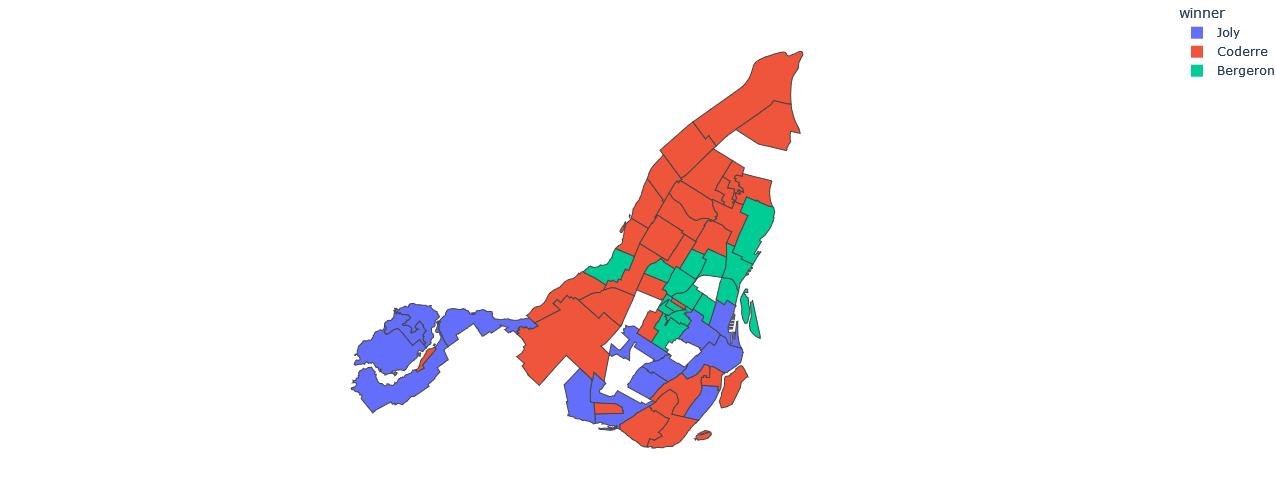

In [12]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="winner",
                    locations="district", featureidkey="properties.district",
                    projection="mercator", hover_data=["Bergeron", "Coderre", "Joly"]
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 7. Many Plots in one main plot.
Scatter plot with box plot and violin plot.
* The code for the plot below depends on the ```statsmodels``` library.  
    * Install it (with venv activated)
    * Import it

In [13]:
import statsmodels

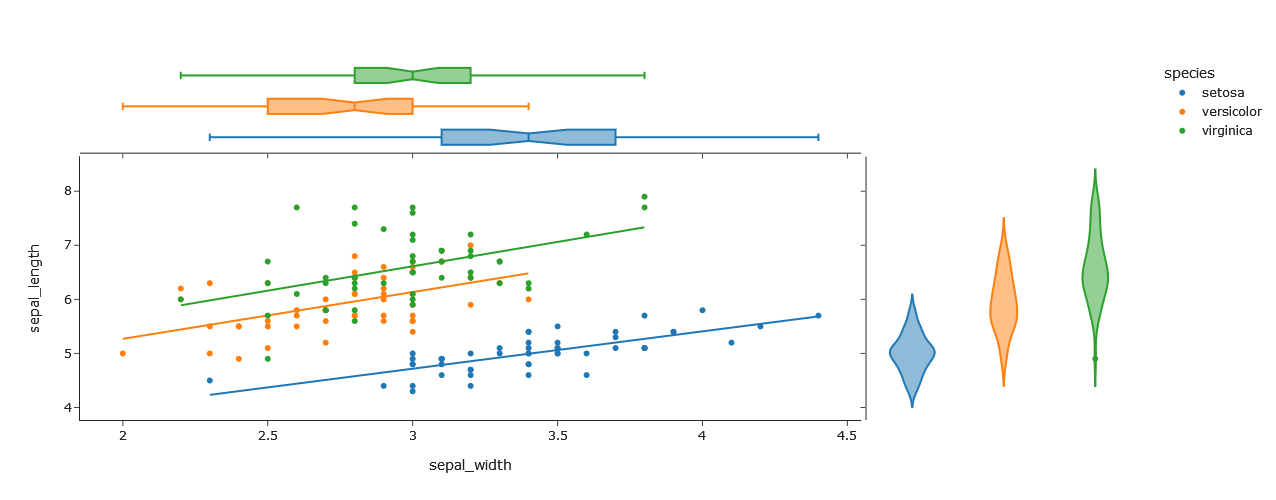

In [14]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

## 8. Advanced violin plot  
There is a Gender Gap in bills and size of bills.

In [15]:
import plotly.graph_objects as go
px.defaults.width=800
px.defaults.height=500
import pandas as pd

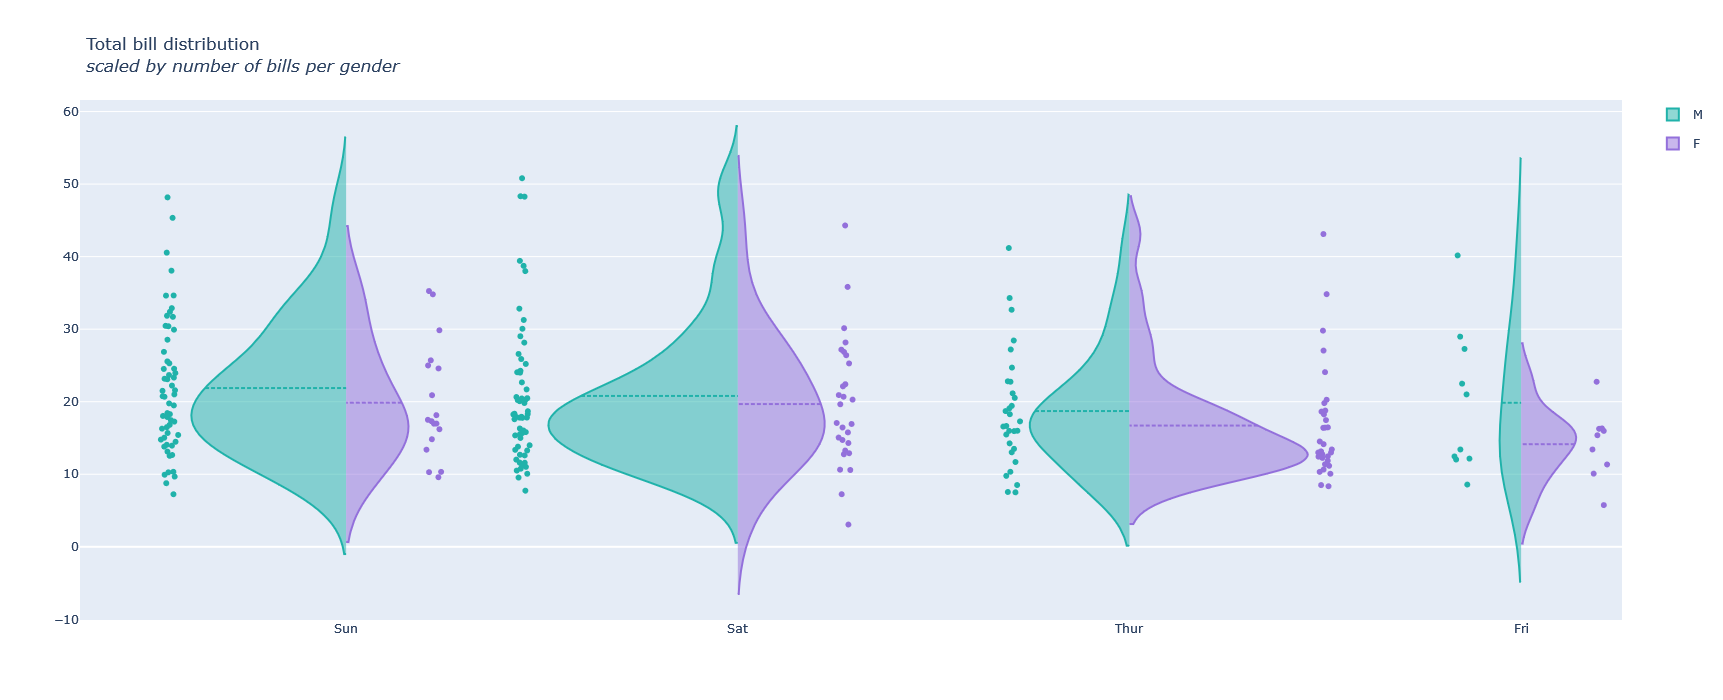

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

pointpos_male = [-0.9,-1.1,-0.6,-0.3]
pointpos_female = [0.45,0.55,1,0.4]
show_legend = [True,False,False,False]

fig = go.Figure()

for i in range(0,len(pd.unique(df['day']))):
    fig.add_trace(go.Violin(x=df['day'][(df['sex'] == 'Male') &
                                        (df['day'] == pd.unique(df['day'])[i])],
                            y=df['total_bill'][(df['sex'] == 'Male')&
                                               (df['day'] == pd.unique(df['day'])[i])],
                            legendgroup='M', scalegroup='M', name='M',
                            side='negative',
                            pointpos=pointpos_male[i], # where to position points
                            line_color='lightseagreen',
                            showlegend=show_legend[i])
             )
    fig.add_trace(go.Violin(x=df['day'][(df['sex'] == 'Female') &
                                        (df['day'] == pd.unique(df['day'])[i])],
                            y=df['total_bill'][(df['sex'] == 'Female')&
                                               (df['day'] == pd.unique(df['day'])[i])],
                            legendgroup='F', scalegroup='F', name='F',
                            side='positive',
                            pointpos=pointpos_female[i],
                            line_color='mediumpurple',
                            showlegend=show_legend[i])
             )

# update characteristics shared by all traces
fig.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count

fig.update_layout(
    title_text="Total bill distribution<br><i>scaled by number of bills per gender",
    violingap=0, violingroupgap=0, violinmode='overlay', height=700, width=900)

fig.show()